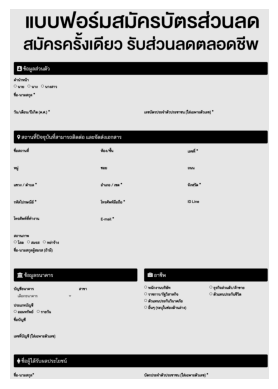

In [157]:
import cv2
import pytesseract
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('form_image/4.jpg')
h,w,c = img.shape
resized = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
thresh, im_bw = cv2.threshold(gray, 180, 230, cv2.THRESH_BINARY)

plt.imshow(cv2.cvtColor(im_bw, cv2.COLOR_BGR2RGB))  
plt.axis('off')
plt.show()

In [163]:
custom_config = r'-l tha+eng --psm 6 --dpi 2400'
text = pytesseract.pytesseract.image_to_string(cv2.cvtColor(im_bw, cv2.COLOR_BGR2RGB), config=custom_config)
print(text)

|              ส"                        Bem                      Ben                         |
°“»
an                         เ          ”                     Hs             |                                                                p= |
B ข้อมูลส่วนตัว
คํานําหน้า
๐ นาย 0๐ นาง 0๐ นางสาว
ชื่อ-นามสกุล *
วัน/เดือน/ปีเกิด (RA) *                                                                          เลขบัตรประจําตัวประชาชน [ใส่เฉพาะตัวเลข] *
9 สถานทีปัจจุบันทีสามารถติดต่อ และจัดส่งเอกสาร
ชื่อสถานที่                                                        ห้อง/ชั้น                                                          เลขที่ *
หมู่                                                                ซอย                                                               ถนน
แขวง / ตําบล *                                                 อําเภอ / เขต *                                                  จังหวัด *
รหัสไปรษณีย์ *                                                   โทรศัพท์มือถือ *    